In [2]:
import fcalc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Binarizer
import matplotlib.pyplot as plt
import seaborn as sns
le=LabelEncoder()
from sklearn.metrics import accuracy_score, classification_report,recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Data preparation

In [3]:
df = pd.read_csv('data_sets/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

<Axes: xlabel='Education', ylabel='count'>

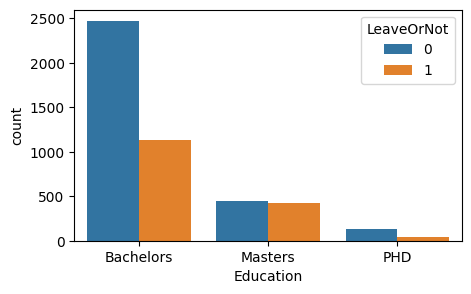

In [5]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='Education',hue='LeaveOrNot')

<Axes: xlabel='JoiningYear', ylabel='count'>

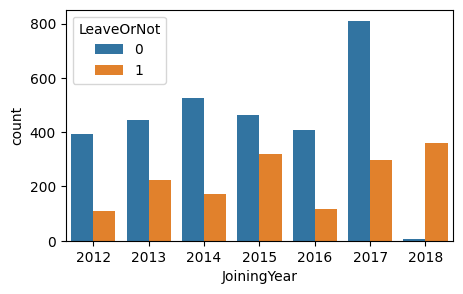

In [6]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='JoiningYear',hue='LeaveOrNot')

<Axes: xlabel='City', ylabel='count'>

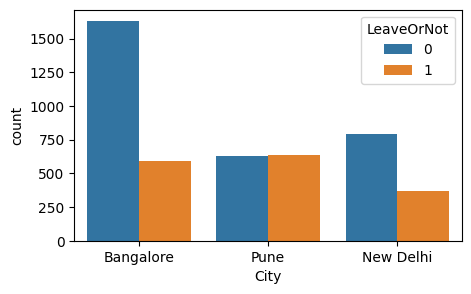

In [7]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='City',hue='LeaveOrNot')

<Axes: xlabel='PaymentTier', ylabel='count'>

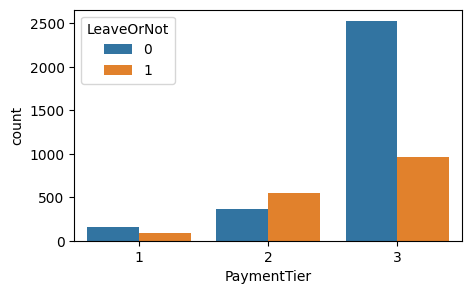

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='PaymentTier',hue='LeaveOrNot')

<Axes: xlabel='Age', ylabel='count'>

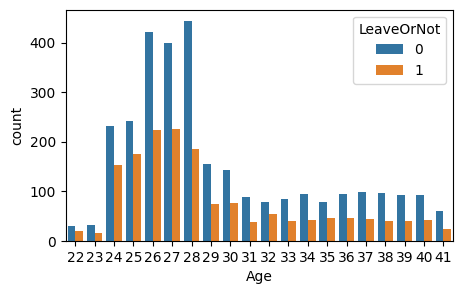

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='Age',hue='LeaveOrNot')

## Lazy-fca with pattern structures

In [35]:
df.loc[:, "Education"] = le.fit_transform(df["Education"])
df.loc[:, "Gender"] = le.fit_transform(df["Gender"])
df.loc[:, "EverBenched"] = le.fit_transform(df["EverBenched"])
df.loc[:, "JoiningYear"] = le.fit_transform(df["JoiningYear"])
df.loc[:, "City"] = le.fit_transform(df["City"])


In [36]:
X = df.iloc[:1000,:-1]
y = df[:1000]['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,5,0,3,34,1,0,0
1,0,1,2,1,28,0,0,3
2,0,2,1,3,38,0,0,2
3,1,4,0,3,27,1,0,5
4,1,5,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
995,0,0,0,3,26,1,0,4
996,0,2,2,2,26,0,0,4
997,0,4,1,3,28,0,0,5
998,0,3,0,3,28,1,0,5


In [37]:
method = ["standard", "standard-support" , "ratio-support"]
alpha = [0.1, 0.5, 0.9]
for i in method:
    for j in alpha:
        pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train,categorical=np.array([0,1,2,3,5,6,7]), 
                                                   method = i, alpha = j)
        pat_cls.predict(X_test.values)
        acc_scr = accuracy_score(y_test,pat_cls.predictions)
        acc_max = 0.1
        if acc_scr > acc_max:
            acc_max = acc_score
        print("Method:",i,"|","Alpha:",j,"|","Accuracy:",round(acc_scr,4))
print("Best score:", acc_max)

Method: standard | Alpha: 0.1 | Accuracy: 0.7367
Method: standard | Alpha: 0.5 | Accuracy: 0.6533
Method: standard | Alpha: 0.9 | Accuracy: 0.0633
Method: standard-support | Alpha: 0.1 | Accuracy: 0.7367
Method: standard-support | Alpha: 0.5 | Accuracy: 0.6967
Method: standard-support | Alpha: 0.9 | Accuracy: 0.6767
Method: ratio-support | Alpha: 0.1 | Accuracy: 0.7533
Method: ratio-support | Alpha: 0.5 | Accuracy: 0.7467
Method: ratio-support | Alpha: 0.9 | Accuracy: 0.7767
Best score: 0.7767


In [50]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train,categorical=np.array([0,1,2,3,5,6,7]), 
                                                   method = "standard", alpha = 0.1)

In [51]:
pat_cls.predict(X_test.values)

In [52]:
from sklearn.metrics import accuracy_score, f1_score
acc_score = round(accuracy_score(y_test,pat_cls.predictions),4)
recall_0 = round(recall_score(y_test, pat_cls.predictions,pos_label = 0),4)
recall_1 = round(recall_score(y_test, pat_cls.predictions,pos_label = 1),4)
f_score = round(f1_score(y_test, pat_cls.predictions),4)
PatBin = {"Model": "Lazy_FCA","Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
PatBin

{'Model': 'Lazy_FCA',
 'Accuracy': 0.7367,
 'Recall_0': 0.8168,
 'Recall_1': 0.5714,
 'F_score': 0.5864}

## Classification with standard ML tools

In [53]:
def try_models(model):
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    acc_score = round(accuracy_score(y_test, y_preds),4)
    recall_0 = round(recall_score(y_test, y_preds,pos_label = 0),4)
    recall_1 = round(recall_score(y_test, y_preds,pos_label = 1),4)
    f_score = round(f1_score(y_test, y_preds),4)
    result = {"Model": model,"Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
    return result

In [54]:
LogReg = try_models(LogisticRegression())
LogReg["Model"] = "LogisticRegression"
RanFor = try_models(RandomForestClassifier(random_state=666))
RanFor["Model"] = "RandomForest"
KNN = try_models(KNeighborsClassifier())
KNN["Model"] = "KNeighbors"
DecTree = try_models(DecisionTreeClassifier())
DecTree["Model"] = "DecisionTree"


In [55]:
final = pd.DataFrame([LogReg, RanFor, KNN,DecTree, PatBin])

final

,Model,Accuracy,Recall_0,Recall_1,F_score
0,LogisticRegression,0.7100,0.8614,0.3980,0.4727
1,RandomForest,0.8267,0.8911,0.6939,0.7234
2,KNeighbors,0.7900,0.9010,0.5612,0.6358
3,DecisionTree,0.8233,0.8861,0.6939,0.7196
4,Lazy_FCA,0.7367,0.8168,0.5714,0.5864
